In [1]:
import nltk
import pandas as pd
import os
import pycountry
import numpy as np
import spacy
import allcities
import warnings; warnings.simplefilter('ignore')

In [7]:
df = pd.read_csv("task8.csv")
df = df[['title', 'text']]
df

,title,text
0,Non-uniform refinement: Adaptive regularizatio...,Single particle cryogenic electron microscopy ...
1,Stochastic challenges to interrupting helminth...,Helminthiases are a class of the neglected tro...
2,Comparison of alternative models of human move...,Accurately predicting the geographical spread ...
3,Altered polarization of PAR-2 signaling during...,Protease-activated receptors (PARs) are G prot...
4,TALC: Transcription Aware Long Read Correction,Recent advances in RNA sequencing (RNA-seq) te...
...,...,...
1036,An in vivo cell-based assay for investigating ...,Severe acute respiratory syndrome (SARS) is a ...
1037,A systematic review on the efficacy and safety...,COVID-19 (Coronavirus Disease-2019) is a publi...
1038,The epidemic of 2019-novel-coronavirus (2019-n...,"In December 2019, a novel coronavirus was dete..."
1039,Finding equipoise: CEPI revises its equitable ...,Launched at Davos in January 2017 with funding...


# TASK 8
- Are there geographic variations in the rate of COVID-19 spread?
- Are there geographic variations in the mortality rate of COVID-19?
- Is there any evidence to suggest geographic based virus mutations?

In [261]:
all_countries = [i.name.lower() for i in pycountry.countries]
all_countries.append('korea')
all_countries.append('usa')
all_countries.append('uk')
all_countries.append('britain')

In [262]:
geo_df = pd.DataFrame()

for i, row in df.iterrows():
    pars = row['text'].split('\n')
    for par in pars:
        for country in all_countries:
            if country in par.lower():
#                 print(country)
                geo_df = geo_df.append([[row['title'], par, country]])

In [263]:
geo_df.columns = ['title', 'text', 'country']
geo_df

,title,text,country
0,Non-uniform refinement: Adaptive regularizatio...,Another possible approach to local control of ...,uk
0,Stochastic challenges to interrupting helminth...,"In recent years, mathematical models of both i...",uk
0,Stochastic challenges to interrupting helminth...,In Sec. 2 we introduce the mathematical model ...,mali
0,Comparison of alternative models of human move...,Data 79 Historical incidence of measles in Eng...,uk
0,Comparison of alternative models of human move...,The copyright holder for this preprint (which ...,mali
...,...,...,...
0,One-tube smart genetic testing via coupling is...,The Bayer Contour Next Blood Glucose Test Stri...,china
0,One-tube smart genetic testing via coupling is...,The Bayer Contour Next Blood Glucose Test Stri...,cuba
0,One-tube smart genetic testing via coupling is...,The Bayer Contour Next Blood Glucose Test Stri...,usa
0,One-tube smart genetic testing via coupling is...,A series of tubes containing 9 mL aliquots of ...,cuba


In [264]:
mask = geo_df['text'].str.contains('deaths')
death_df = geo_df[mask].reset_index()
del death_df['index']
death_df

,title,text,country
0,Preliminary estimation of the basic reproducti...,"The atypical pneumonia case, caused by a novel...",china
1,Preliminary estimation of the basic reproducti...,"The atypical pneumonia case, caused by a novel...",hong kong
2,Preliminary estimation of the basic reproducti...,"The atypical pneumonia case, caused by a novel...",japan
3,Preliminary estimation of the basic reproducti...,"The atypical pneumonia case, caused by a novel...",thailand
4,Preliminary estimation of the basic reproducti...,"The atypical pneumonia case, caused by a novel...",korea
...,...,...,...
691,Middle East respiratory syndrome,Although the fi rst case of MERS occurred in J...,usa
692,COVID-19 R0: Magic number or conundrum?,There is an increasing concern about COVID-19 ...,china
693,The epidemic of 2019-novel-coronavirus (2019-n...,"Until February 6, 2020, confirmed 2019-nCoV pn...",china
694,The epidemic of 2019-novel-coronavirus (2019-n...,"Until February 6, 2020, confirmed 2019-nCoV pn...",usa


In [265]:
_ = [countries_mentioned.append(row['country']) for i, row in death_df.iterrows()]
c = []
t = []

for i in countries_mentioned:
    if i not in c:
        c.append(i)
        t.append(1)
    else:
        t[c.index(i)] += 1
        
country_dict = dict(zip(c, t))

In [118]:
death_df = pd.DataFrame(death_df['text'].drop_duplicates())
death_df

,text
0,"The atypical pneumonia case, caused by a novel..."
5,"On 12 th December 2019, a pneumonia case of un..."
6,On 20 th January 2020. two local infections in...
7,"As of 31 January 2020, mainland China reported..."
8,The time from the illness onset to death is al...
...,...
686,"As shown in Fig. 1A , the challenges brought t..."
689,Although the fi rst case of MERS occurred in J...
692,There is an increasing concern about COVID-19 ...
693,"Until February 6, 2020, confirmed 2019-nCoV pn..."


In [140]:
import re

d_rate = []
c_rate = []

for i, r in death_df.iterrows():
    sentences = r['text'].lower().replace(',', '').split('.')
    for sentence in sentences:
        if 'cases' in sentence or 'deaths' in sentence:
            rege = re.findall(r'[1-9][0-9]+ cases', sentence) 
            if rege != []: c_rate.append([rege, sentence])
                
            rege = re.findall(r'[1-9][0-9]+ infections', sentence) 
            if rege != []: c_rate.append([rege, sentence])
                
            rege = re.findall(r'[1-9][0-9]+ deaths', sentence) 
            if rege != []: d_rate.append([rege, sentence])

In [147]:
months = ['december', 'january', 'february', 'march', 'april']

deaths = pd.DataFrame(d_rate, columns=['deaths', 'text'])
cases = pd.DataFrame(c_rate, columns=['cases', 'text'])

In [149]:
deaths

,deaths,text
0,[56 deaths],as of january 26 (17:00 gmt) 2020 there have ...
1,[17 deaths],as of 22 nd january 571 confirmed cases (incl...
2,[259 deaths],as of 31 january 2020 mainland china reported ...
3,[774 deaths],its rapid spread led to the global appearance...
4,[80 deaths],1 more than 2700 infection cases and 80 death...
...,...,...
200,[447 deaths],saudi arabia has reported the most cases (101...
201,[121 deaths],1 at the date of february 20th 2020 sars-cov-...
202,[492 deaths],as of 5th february there were 24377 cases con...
203,[774 deaths],in 2002 the severe acute respiratory syndrome...


In [242]:
data_for_d = pd.DataFrame(np.zeros((3, len(months))))
data_for_d.columns = months
data_for_d.index  = ['total', 'times_mentioned', 'mean']

total = data_for_d.iloc[0]
t_mentioned = data_for_d.iloc[1]
mean = data_for_d.iloc[2]

for i, row in deaths.iterrows():
    for month in months:
        if month in row['text']:
            d = 0
            for death in row['deaths']:
                d += int(re.findall(r'[1-9][0-9]+', death)[0])
                t_mentioned[month] += 1
#                 add_pl = data_for_c.iloc[0]
#                 print(add_pl)
            total[month] += d
    

for month in months:
    mean[month] = total[month] / t_mentioned[month]

data_for_d = data_for_d.dropna(axis=1).astype(np.int64)

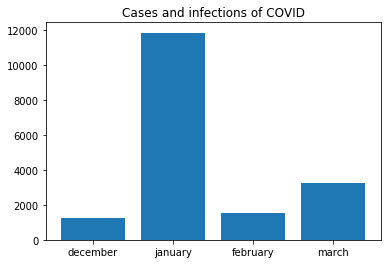

In [249]:
import matplotlib.pyplot as plt

means = list(data_for_d.iloc[2])
plt.bar(months[:-1], means)
plt.title("Cases and infections of COVID")
plt.show()

In [245]:
# data_for_cases = pd.DataFrame(0, index=np.arange(1),columns=months)
data_for_c = pd.DataFrame(np.zeros((3, len(months))))
data_for_c.columns = months
data_for_c.index  = ['total', 'times_mentioned', 'mean']

total = data_for_c.iloc[0]
t_mentioned = data_for_c.iloc[1]
mean = data_for_c.iloc[2]

for i, row in cases.iterrows():
    for month in months:
        if month in row['text']:
            d = 0
            for case in row['cases']:
                d += int(re.findall(r'[1-9][0-9]+', case)[0])
                t_mentioned[month] += 1
#                 add_pl = data_for_c.iloc[0]
#                 print(add_pl)
            total[month] += d

for month in months:
    mean[month] = total[month] / t_mentioned[month]

data_for_c = data_for_c.astype(np.int64)

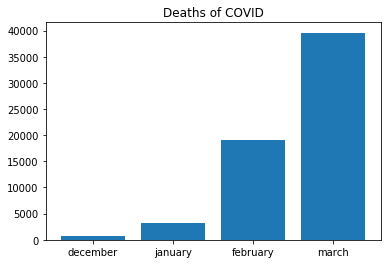

In [250]:
means = list(data_for_c.iloc[2])
plt.bar(months[:-1], means[:-1])
plt.title('Cases of COVID')
plt.show()

In [309]:
# data_for_cases = pd.DataFrame(0, index=np.arange(1),columns=months)
data = pd.DataFrame(np.zeros((3, len(c))))
data.columns = c
data.index  = ['total', 'times_mentioned', 'mean']

total = data.iloc[0]
t_mentioned = data.iloc[1]
mean = data.iloc[2]

for i, row in deaths.iterrows():
    for country in c:
        if country in row['text']:
            d = 0
            for death in row['deaths']:
                d += int(re.findall(r'[1-9][0-9]+', death)[0])
                t_mentioned[country] += 1
            total[country] += d

mean['usa'] += mean['united states']
t_mentioned['usa'] += t_mentioned['united states']

# mean['uk'] += mean['britain']
# t_mentioned['uk'] += t_mentioned['britain']

# del data['britain']
    
try:
    for country in c:
        mean[country] = total[country] / t_mentioned[country]
except: pass
        
data = data.dropna(axis=1).astype(np.int64)
del data['united states']
data

,china,hong kong,japan,thailand,korea,saudi arabia,niger,nigeria,italy,macao,myanmar,bangladesh,argentina,brazil,liberia,usa,uk,haiti
total,127211,501588,15000,19122,255,6438,190,190,4692,672,138366,119000,1441,775,16132,9920,19,222570
times_mentioned,75,4,1,1,6,9,2,2,5,2,1,1,1,2,2,9,1,1
mean,1696,125397,15000,19122,42,715,95,95,938,336,138366,119000,1441,387,8066,1102,19,222570


In [312]:
# figure(num=None, figsize=(50, 10), facecolor='w', edgecolor='k')
# means = list(data.iloc[2])
# plt.bar(list(data.columns), means)
# plt.title('Deaths of COVID by country')
# plt.show()

In [279]:
# data_for_cases = pd.DataFrame(0, index=np.arange(1),columns=months)
data = pd.DataFrame(np.zeros((3, len(c))))
data.columns = c
data.index  = ['total', 'times_mentioned', 'mean']

total = data.iloc[0]
t_mentioned = data.iloc[1]
mean = data.iloc[2]

for i, row in cases.iterrows():
    for country in c:
        if country in row['text']:
            d = 0
            for case in row['cases']:
                d += int(re.findall(r'[1-9][0-9]+', case)[0])
                t_mentioned[country] += 1
            total[country] += d

mean['usa'] += mean['united states']
t_mentioned['usa'] += t_mentioned['united states']

# mean['uk'] += mean['britain']
# t_mentioned['uk'] += t_mentioned['britain']

# del data['britain']
    
try:
    for country in c:
        mean[country] = total[country] / t_mentioned[country]
except: pass
        
data = data.dropna(axis=1).astype(np.int64)
del data['united states']
data

,china,hong kong,japan,thailand,korea,saudi arabia,australia,canada,france,malaysia,...,sri lanka,oman,mexico,italy,philippines,india,argentina,brazil,finland,usa
total,906715,878,58612,8612,46958,8928,7753,7753,7753,7734,...,7734,717,19,33540,7734,207863,21157,19,7734,112468
times_mentioned,45,1,3,2,14,7,2,2,2,1,...,1,3,1,6,1,5,1,1,1,6
mean,20149,878,19537,4306,3354,1275,3876,3876,3876,7734,...,7734,239,19,5590,7734,41572,21157,19,7734,18744


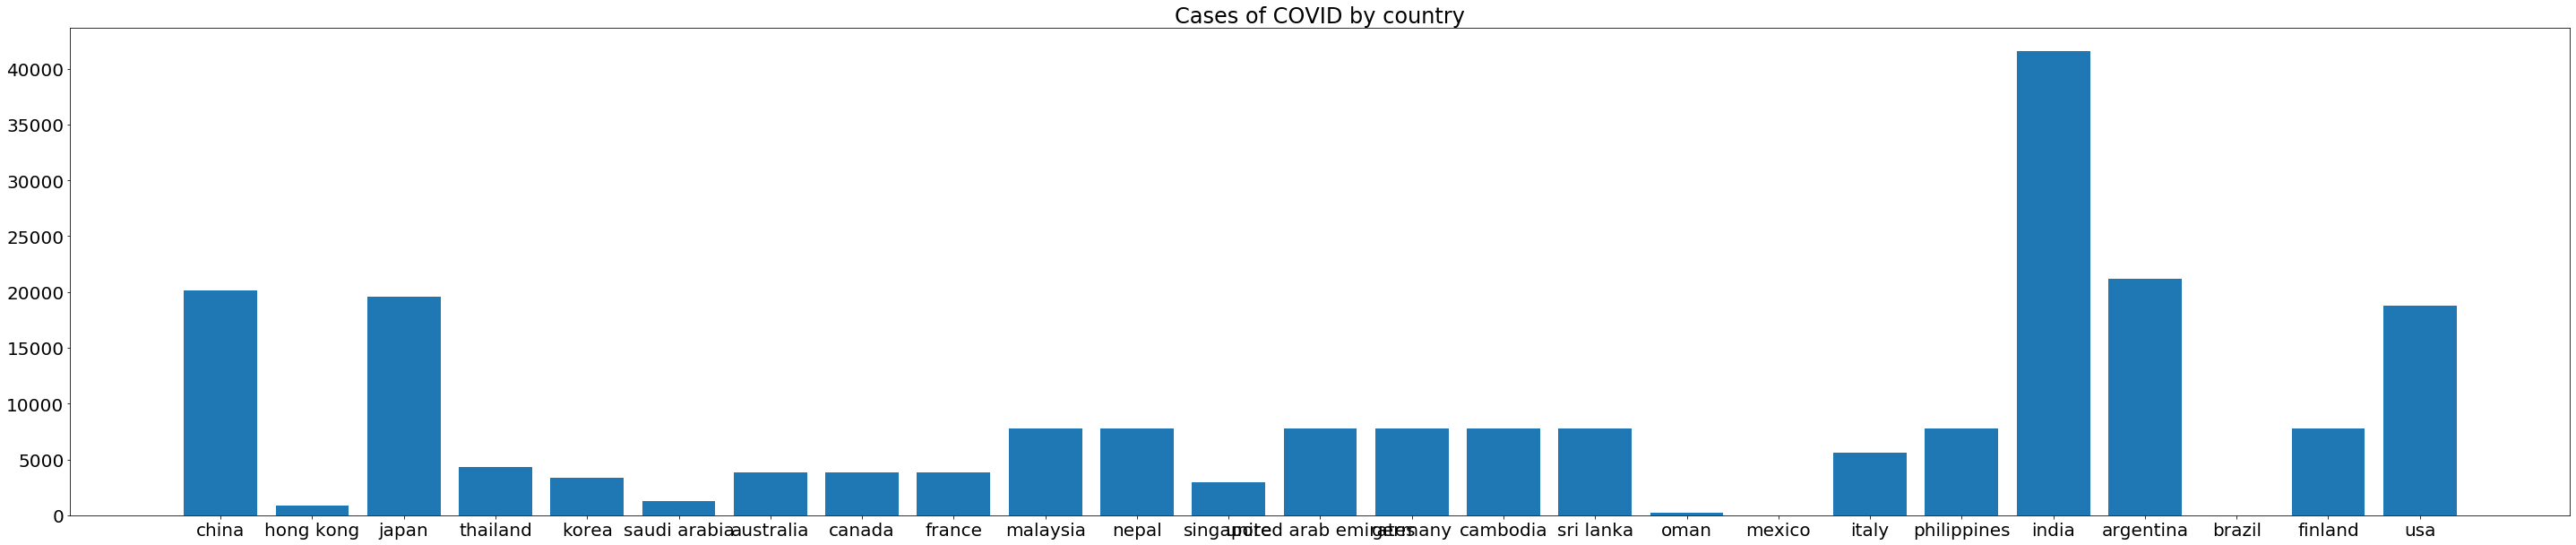

In [307]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(50, 10), facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 20})

means = list(data.iloc[2])
plt.bar(list(data.columns), means)
plt.title('Cases of COVID by country')
plt.show()